In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# 1
dataframe = pd.read_csv('medical_examination.csv')
df = pd.DataFrame(dataframe)

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [30]:

# 2
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df = df.drop(columns= ['BMI'])


In [31]:
# 3 '0' = Good, '1' = Bad
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [32]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})

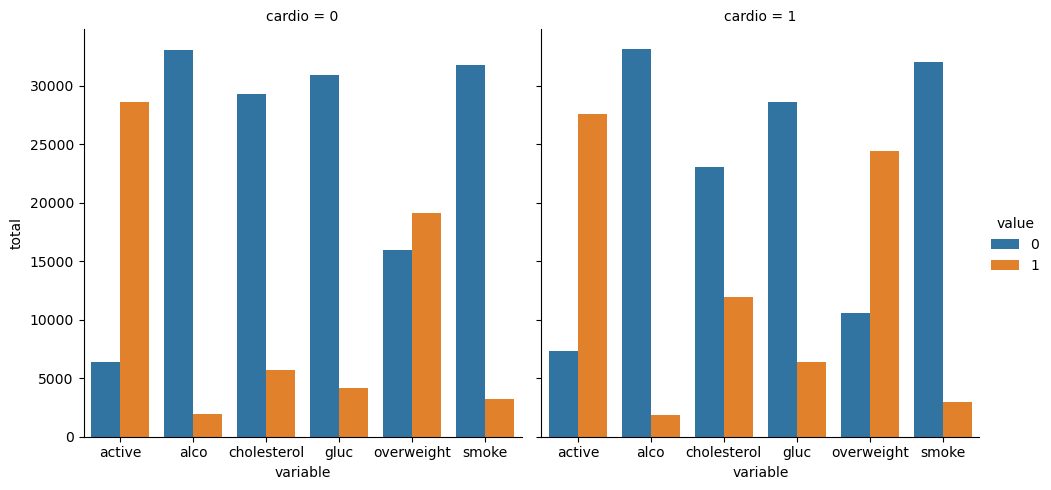

In [33]:
sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')


In [40]:

df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025))]
df_heat = df_heat[(df_heat['height'] <= df_heat['height'].quantile(0.975))]
df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025))]
df_heat = df_heat[(df_heat['weight'] <= df_heat['weight'].quantile(0.975))]


In [38]:
df_heat.shape

(38, 14)

In [36]:
df.shape

(70000, 14)

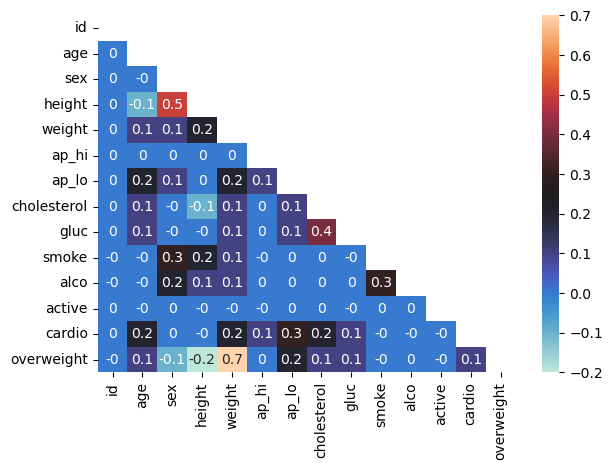

In [41]:
corr = round(df_heat.corr(),1)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots()
ax.plot()
sns.heatmap(corr, annot=True, mask=mask, cmap='icefire')
plt.tight_layout()
plt.show()

In [12]:

# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['height'] >= df['height'].quantile(0.025))]
    df_heat = df[(df['height'] <= df['height'].quantile(0.975))]
    df_heat = df[(df['weight'] >= df['height'].quantile(0.025))]
    df_heat = df[(df['weight'] <= df['height'].quantile(0.975))]

    # 12
    corr = df.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14
    fig, ax = plt.subplots()
    ax.plot()

    # 15
    sns.heatmap(df_heat, annot=True)
    plt.tight_layout()
    heatmap = fig

    # 16
    fig.savefig('heatmap.png')
    return fig
